In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

C:\Python\Anaconda3-5.2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('./data/HousePrice_preprocessing_full_ver3.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1,0.073350,1,65.0,-0.207071,0.75,0.875,1,0.75,1,...,0.1,0.5,0.833333,-0.751918,0.216429,-0.359202,-0.270116,1,1,208500
1,2,-0.872264,1,80.0,-0.091855,0.75,0.875,1,0.75,2,...,0.1,0.5,0.833333,1.625638,-0.704242,-0.359202,-0.270116,1,1,181500
2,3,0.073350,1,68.0,0.073455,0.75,0.625,1,0.75,1,...,0.1,0.5,0.833333,-0.751918,-0.070337,-0.359202,-0.270116,1,1,223500
3,4,0.309753,1,60.0,-0.096864,0.75,0.625,1,0.75,3,...,0.1,0.5,0.833333,-0.751918,-0.175988,4.091122,-0.270116,1,2,140000
4,5,0.073350,1,84.0,0.375020,0.75,0.625,1,0.75,2,...,0.1,0.5,0.833333,0.779930,0.563567,-0.359202,-0.270116,1,1,250000


In [3]:
# SalePrice 통계
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Python\Anaconda3-5.2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


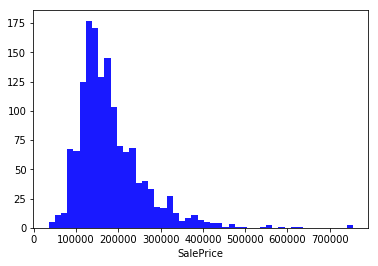

In [4]:
# 집값 분포 확인
sns.distplot(df['SalePrice'],kde = False, color = 'b', hist_kws={'alpha':0.9});

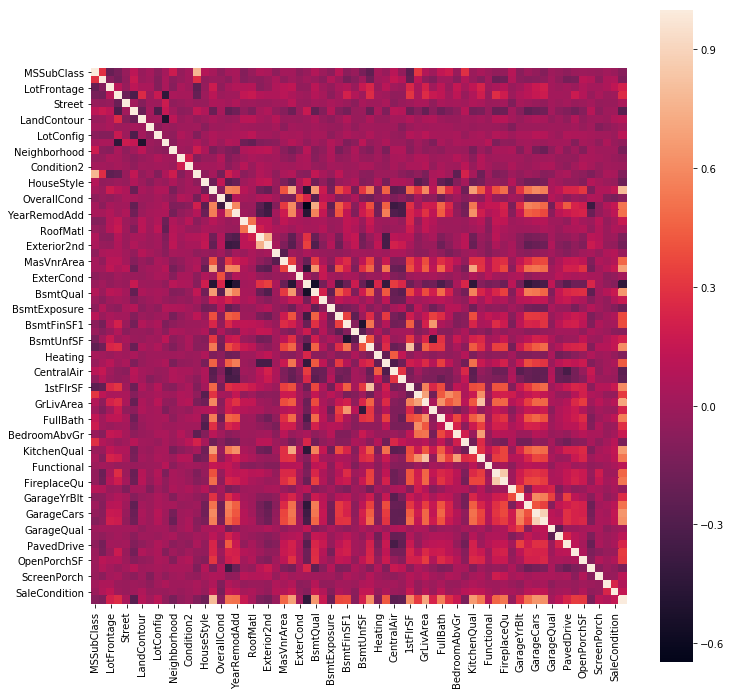

In [5]:
# SalePrice와 변수간 상관계수 확인
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
plt.subplots(figsize = (12, 12))
sns.heatmap(corr, vmax = 1, square = True)

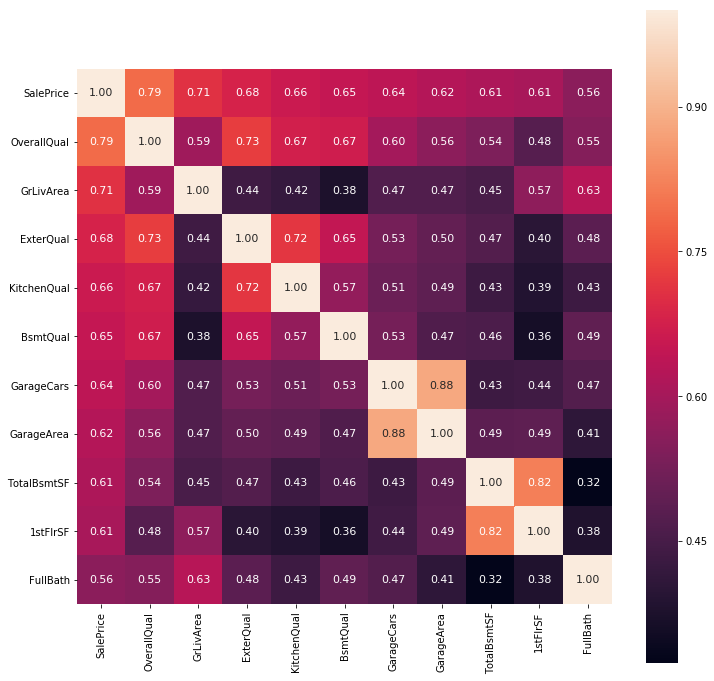

In [6]:
# SalePrice와 높은 상관관계를 지닌 변수 Top 10 매트릭스
var = 11
cols = corr.nlargest(var, 'SalePrice')['SalePrice'].index
corr = np.corrcoef(df[cols].values.T)

plt.subplots(figsize = (12, 12))
hm = sns.heatmap(corr, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 11},
                 xticklabels = cols.values, yticklabels = cols.values)
plt.show()

<Figure size 432x288 with 0 Axes>

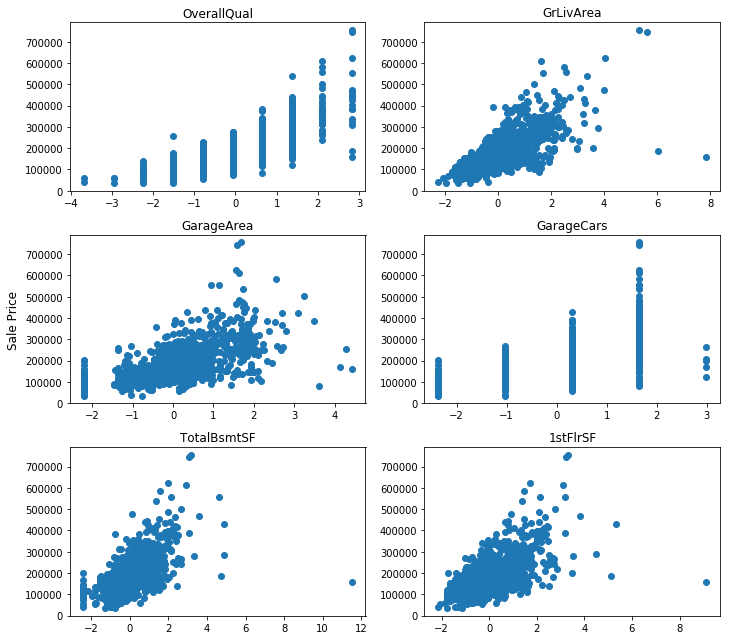

In [7]:
# 특정 변수들의 SalePrcie에 대한 산점도
plt.figure(1)
f, axarr = plt.subplots(3,2,figsize=(10,9))
price = df.SalePrice.values
axarr[0,0].scatter(df.OverallQual.values, price)
axarr[0,0].set_title('OverallQual')
axarr[0,1].scatter(df.GrLivArea.values, price)
axarr[0,1].set_title('GrLivArea')
axarr[1,0].scatter(df.GarageArea.values, price)
axarr[1,0].set_title('GarageArea')
axarr[1,1].scatter(df.GarageCars.values, price)
axarr[1,1].set_title('GarageCars')
axarr[2,0].scatter(df.TotalBsmtSF.values, price)
axarr[2,0].set_title('TotalBsmtSF')
axarr[2,1].scatter(df['1stFlrSF'].values, price)
axarr[2,1].set_title('1stFlrSF')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()

In [8]:
# seed 값 설정
seed = 0
np.random.seed(seed)
# Scaler
scale = StandardScaler()
x_train = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']]
x_train = scale.fit_transform(x_train)

y = df['SalePrice'].values

x_train, x_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.3, random_state = seed)

In [9]:
# 모델링
model = Sequential()
model.add(Dense(10, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))
# 모델 compile
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = [metrics.mae])

In [10]:
# 모델 fitting
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size = 10)

Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 0s 370us/step - loss: 38709259334.1370 - mean_absolute_error: 180581.4473 - val_loss: 39796795233.0228 - val_mean_absolute_error: 181683.5230
Epoch 2/200
1022/1022 [==============================] - 0s 107us/step - loss: 38669113315.9452 - mean_absolute_error: 180486.7809 - val_loss: 39678215752.4749 - val_mean_absolute_error: 181421.3301
Epoch 3/200
1022/1022 [==============================] - 0s 115us/step - loss: 38382779045.3229 - mean_absolute_error: 179853.1765 - val_loss: 39079450399.5616 - val_mean_absolute_error: 180149.0380
Epoch 4/200
1022/1022 [==============================] - 0s 121us/step - loss: 37362749311.7495 - mean_absolute_error: 177659.2305 - val_loss: 37319157030.5753 - val_mean_absolute_error: 176419.7247
Epoch 5/200
1022/1022 [==============================] - 0s 152us/step - loss: 34967962429.6204 - mean_absolute_error: 172336.2433 - val_loss: 33763333367.81

1022/1022 [==============================] - 0s 106us/step - loss: 758467798.0274 - mean_absolute_error: 18789.3762 - val_loss: 1194446129.1324 - val_mean_absolute_error: 19252.0215
Epoch 43/200
1022/1022 [==============================] - 0s 111us/step - loss: 699609973.7965 - mean_absolute_error: 17922.1238 - val_loss: 1117693259.3607 - val_mean_absolute_error: 18494.1334
Epoch 44/200
1022/1022 [==============================] - 0s 106us/step - loss: 648866068.5871 - mean_absolute_error: 17158.3367 - val_loss: 1043467173.3699 - val_mean_absolute_error: 17757.6222
Epoch 45/200
1022/1022 [==============================] - 0s 102us/step - loss: 601128295.9374 - mean_absolute_error: 16527.2754 - val_loss: 983589563.4338 - val_mean_absolute_error: 16946.4933
Epoch 46/200
1022/1022 [==============================] - 0s 97us/step - loss: 558406442.4579 - mean_absolute_error: 15737.9587 - val_loss: 924018431.5251 - val_mean_absolute_error: 16263.2435
Epoch 47/200
1022/1022 [=================

Epoch 85/200
1022/1022 [==============================] - 0s 111us/step - loss: 11606760.2880 - mean_absolute_error: 1509.5766 - val_loss: 65098606.1533 - val_mean_absolute_error: 1657.7906
Epoch 86/200
1022/1022 [==============================] - 0s 102us/step - loss: 10364804.5679 - mean_absolute_error: 1384.1552 - val_loss: 61018576.8109 - val_mean_absolute_error: 1545.9733
Epoch 87/200
1022/1022 [==============================] - 0s 104us/step - loss: 9264759.0095 - mean_absolute_error: 1284.0033 - val_loss: 57509943.9975 - val_mean_absolute_error: 1413.9314
Epoch 88/200
1022/1022 [==============================] - 0s 107us/step - loss: 8197170.7844 - mean_absolute_error: 1153.9785 - val_loss: 54074994.3223 - val_mean_absolute_error: 1291.5345
Epoch 89/200
1022/1022 [==============================] - 0s 109us/step - loss: 7409948.0646 - mean_absolute_error: 1062.9804 - val_loss: 50258748.2154 - val_mean_absolute_error: 1175.0970
Epoch 90/200
1022/1022 [=============================

Epoch 129/200
1022/1022 [==============================] - 0s 104us/step - loss: 233782.9645 - mean_absolute_error: 144.3611 - val_loss: 11677784.8585 - val_mean_absolute_error: 219.3540
Epoch 130/200
1022/1022 [==============================] - 0s 109us/step - loss: 219289.9298 - mean_absolute_error: 119.0154 - val_loss: 11730548.9323 - val_mean_absolute_error: 333.4135
Epoch 131/200
1022/1022 [==============================] - 0s 104us/step - loss: 211777.2231 - mean_absolute_error: 140.7586 - val_loss: 11289736.9633 - val_mean_absolute_error: 227.3843
Epoch 132/200
1022/1022 [==============================] - 0s 106us/step - loss: 200628.4837 - mean_absolute_error: 114.1271 - val_loss: 11204927.7304 - val_mean_absolute_error: 258.8096
Epoch 133/200
1022/1022 [==============================] - 0s 104us/step - loss: 189184.5604 - mean_absolute_error: 120.2187 - val_loss: 10910510.0526 - val_mean_absolute_error: 214.9798
Epoch 134/200
1022/1022 [==============================] - 0s 107

1022/1022 [==============================] - 0s 114us/step - loss: 13979.9813 - mean_absolute_error: 40.5410 - val_loss: 6207289.2139 - val_mean_absolute_error: 140.3750
Epoch 174/200
1022/1022 [==============================] - 0s 115us/step - loss: 13930.6106 - mean_absolute_error: 44.4355 - val_loss: 6139133.9624 - val_mean_absolute_error: 139.5036
Epoch 175/200
1022/1022 [==============================] - 0s 105us/step - loss: 13023.5663 - mean_absolute_error: 38.5164 - val_loss: 6042803.9894 - val_mean_absolute_error: 163.4262
Epoch 176/200
1022/1022 [==============================] - 0s 105us/step - loss: 13301.5433 - mean_absolute_error: 47.8657 - val_loss: 6024575.2494 - val_mean_absolute_error: 193.0453
Epoch 177/200
1022/1022 [==============================] - 0s 107us/step - loss: 12708.1253 - mean_absolute_error: 45.2546 - val_loss: 5960884.4088 - val_mean_absolute_error: 176.3257
Epoch 178/200
1022/1022 [==============================] - 0s 110us/step - loss: 14881.6827 - 

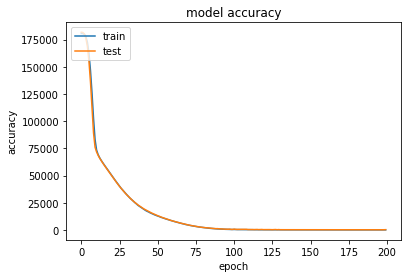

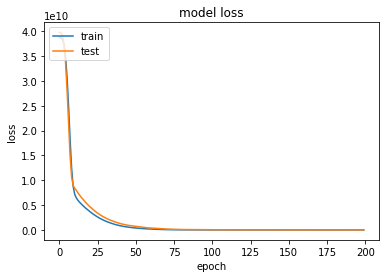

In [11]:
# summarize : accuracy
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
# summarize : loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [12]:
# # x_test vs. y_test
# y_prediction = model.predict(x_test).flatten()
# for i in range(20):
#     label = y_test[i]
#     prediction = y_prediction[i]
    
#     print('실제가격 : {:.3f}, 예상가격 : {:.3f}'.format(label, prediction))

실제가격 : 200624.000, 예상가격 : 200868.281
실제가격 : 133000.000, 예상가격 : 133077.828
실제가격 : 110000.000, 예상가격 : 110041.703
실제가격 : 192000.000, 예상가격 : 192172.516
실제가격 : 88000.000, 예상가격 : 88001.305
실제가격 : 85000.000, 예상가격 : 85010.227
실제가격 : 282922.000, 예상가격 : 283213.562
실제가격 : 141000.000, 예상가격 : 141068.750
실제가격 : 745000.000, 예상가격 : 745892.938
실제가격 : 148800.000, 예상가격 : 148887.250
실제가격 : 208900.000, 예상가격 : 209087.781
실제가격 : 136905.000, 예상가격 : 137020.672
실제가격 : 225000.000, 예상가격 : 225202.844
실제가격 : 123000.000, 예상가격 : 123045.383
실제가격 : 119200.000, 예상가격 : 119256.789
실제가격 : 145000.000, 예상가격 : 145091.531
실제가격 : 190000.000, 예상가격 : 190168.688
실제가격 : 123600.000, 예상가격 : 123633.305
실제가격 : 149350.000, 예상가격 : 149441.953
실제가격 : 155000.000, 예상가격 : 155108.844
